In [ ]:
### Prerna Singh (edited by John D'Uva)
# Original: https://github.com/prernasingh11/CLARITY/blob/master/Cell_extractor4_22.ipynb

# Isolate cell regions and non-cell regions (using centers of mass) for 3D sliced Clarity images
# Use a brain-wide illumination correction for intensity
# Extract 10x the non-cell data than cell data by selecting points within 20 pixels x y and z of cells

In [1]:
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import csv
import pandas as pd
import cv2

from cloudvolume import CloudVolume, view
from tifffile import imsave
from brainlit.utils.session import NeuroglancerSession
import pickle as pkl
import time
import deflate

/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


In [ ]:
# # download a whole image stack into a numpy array from the cloud
# vol = CloudVolume('https://dlab-colm.neurodata.io/brian-dev/'+date+'_ENTANGLaGFP-'+section+'/Ch1_470_bias_corrected/')
# image = vol[:,:,:]

# # save each of 'i' z-planes locally (from the tiff stack)
# for i in range(0,image.shape[2]):
#     if i <10:
#         name = "brian-dev_"+date+"_ENTAGLaGP-"+section+"_Ch0_470_z0-2160_y0-2560_z000%i" %i
#     elif i <100:
#         name = "brian-dev_"+date+"_ENTAGLaGP-"+section+"_Ch0_470_z0-2160_y0-2560_z00%i" %i
#     elif i <1000:
#         name = "brian-dev_"+date+"_ENTAGLaGP-"+section+"_Ch0_470_z0-2160_y0-2560_z0%i" %i
#     else:
#         name = "brian-dev_"+date+"_ENTAGLaGP-"+section+"_Ch0_470_z0-2160_y0-2560_z%i" %i
#     imsave(section+"/%s.tiff" %name, image[:,:,i])

In [3]:
# Two options for pulling data from s3 using CloudVolume (both work)...

# Option 1) FAST, MEMORY INTENSIVE: 
# Download them 52 slices at a time and then write out the files by cutting them out of memory.

# Option 2) MEDIUM, DISK INTENSIVE: 
# Loop through one at a time but cache the last Z chunks on disk

In [ ]:
# OPTION 1 - use this
dir = "s3://open-neurodata/brainlit/brain1"
vol = CloudVolume(dir, parallel=True, fill_missing=True, cache=True, mip=2)
begin = 2160
end = 2500

for z in range(begin, end):
    if z % vol.chunk_size.z == 0:
        vol.cache.flush()
    image = vol[:, :, z]
    pkl.dump(image, open("../../../../pickles6/image"+str(z)+".pkl", "wb"))

Downloading: 502it [00:05, 98.19it/s]                         
Downloading: 498it [00:05, 94.43it/s]                         
Downloading: 508it [00:05, 89.62it/s]                         
Downloading: 504it [00:11, 45.05it/s]                         
Downloading: 510it [00:20, 25.34it/s]                         
Downloading: 510it [00:29, 17.32it/s]                         
Downloading: 510it [00:35, 14.53it/s]                         
Downloading: 510it [00:41, 12.41it/s]                         
Downloading: 510it [00:41, 12.24it/s]                         
Downloading: 508it [00:42, 11.82it/s]                         
Downloading: 510it [00:42, 11.95it/s]                         
Downloading: 510it [00:42, 11.94it/s]                         
Downloading: 510it [00:43, 11.77it/s]                         
Downloading: 508it [00:44, 11.51it/s]                         
Downloading: 506it [00:44, 11.39it/s]                         
Downloading: 508it [00:44, 11.41it/s]                  

Downloading: 466it [00:01, 305.04it/s]
Downloading: 508it [00:01, 371.51it/s]
Downloading: 504it [00:01, 275.29it/s]                         
Downloading: 490it [00:01, 253.25it/s]                         
Downloading:   0%|          | 0/256 [00:00<?, ?it/s]
Downloading: 438it [00:03, 140.31it/s][00:00<00:00, 230.35it/s] 
Downloading: 420it [00:01, 278.69it/s]
Downloading: 486it [00:01, 384.93it/s]                         
Downloading: 504it [00:01, 444.26it/s][00:02<00:00, 97.49it/s]  
Downloading: 494it [00:01, 392.53it/s]                         
Downloading: 494it [00:01, 376.21it/s]                          
Downloading: 494it [00:01, 393.70it/s]                         
Downloading: 494it [00:02, 216.95it/s]                        
Downloading: 508it [00:01, 355.17it/s]                         
Downloading: 508it [00:01, 314.78it/s]                         
Downloading: 498it [00:01, 337.81it/s]                         
Downloading: 500it [00:01, 310.54it/s]                      

Downloading: 506it [00:00, 921.58it/s]                          
Downloading: 500it [00:01, 440.29it/s]                          
Downloading: 500it [00:01, 449.80it/s]                         
Downloading: 492it [00:01, 428.26it/s]                         
Downloading: 504it [00:01, 412.44it/s]                         
Downloading:   0%|          | 0/256 [00:01<?, ?it/s]
Downloading: 454it [00:01, 230.93it/s][00:02<00:01, 75.98it/s]  
Downloading: 456it [00:02, 175.09it/s]                        ]
Downloading: 448it [00:02, 170.68it/s][00:02<00:00, 74.61it/s] 
Downloading: 346it [00:04, 83.73it/s]
Downloading: 460it [00:02, 180.69it/s]                        
Downloading: 498it [00:02, 194.58it/s]                         
Downloading: 500it [00:02, 207.79it/s]                         
Downloading: 504it [00:02, 208.16it/s]                        
Downloading: 508it [00:02, 199.70it/s]                        
Downloading: 492it [00:02, 172.08it/s]                        
Downloading: 5

In [5]:
# OPTION 2 - not currently running this
dir = "s3://open-neurodata/brainlit/brain1"
vol = CloudVolume(dir, parallel=True, fill_missing=True)
        
chunk = 13
begin = 6000
end = 6300
for z in range(begin, end, chunk):
    image = vol[:, :, z:(z+chunk)]
    for j in range(chunk):
        image_slice = image[:,:,j]
        pkl.dump(image_slice, open("../../../../pickles4/image"+str(z+j)+".pkl", "wb"))

In [11]:
# I don't think I need this. I want to read them as individual tifs instead of one huge numpy array

# # Create empty np array to load pkl files into (33792 x 25600 x 294)
# arr = np.empty([16896, 12800, 1])
# # arr = np.empty([33792, 25600, 1])
               
# # 6000+len(os.listdir('../../../../pickles4'))-1 
    
# # load pickle data
# for i in range(6000, 6290):
#     with open("../../../../pickles5/image"+str(i)+".pkl", 'rb') as data1:
#         data2 = pkl.load(data1)
#         data3 = np.squeeze(data2,3)
#         arr = np.dstack((arr, data3))
#         #print(i)

# # Remove the first slice (empty)
# arr = arr[:,:,1:-1]

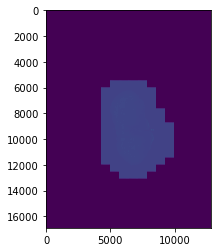

In [11]:
# import matplotlib.pyplot as plt
# test = arr[:,:,2]
# plt.imshow(test)

In [5]:
# Save pickled files as tiffs
begin = 2000
end = 2200
folder = "../../../../pickles6/"

if not os.path.exists("../../../../pickle_tiffs/"):
    os.makedirs("../../../../pickle_tiffs/")

for i in range(0, len(os.listdir(folder))-1  ):
    ii = i + begin #6000
    if ii <10:
        name = "z000"+ str(begin+i)
    elif ii <100:
        name = "z00"+ str(begin+i)
    elif ii <1000:
        name = "z0"+ str(begin+i)
    else:
        name = "z" + str(begin+i)
               
    with open(folder + image + str(ii) + ".pkl", 'rb') as data1:
        data2 = pkl.load(data1)
        data3 = np.squeeze(data2,3)
        imsave("../../../../pickle_tiffs/%s.tiff" %name, data3)

In [3]:
# Establsih 'list' of tiff file names
file_path_img = os.path.join('../../../../pickle_tiffs/')
list = os.listdir(file_path_img)

In [8]:
#preprocess the csv with file labels
csv='cellCenters4.csv'
fileLabelCSV = pd.read_csv(csv)
# fileLabelCSV = pd.read_csv('ENTANGLtrainingdata/E12L-training.csv')

#make ordered lists of each coordinate dimension
xfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): X (px)'])
yfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): Y (px)'])
zfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): Z (px)'])
      
# ROI = np.zeros((len(xfileLabelCSV),12,12,12))

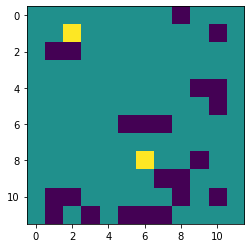

In [81]:
# for index, i in enumerate(range(zcoord-6,zcoord+6)):    
count = 1

for file in list:
    if str("tif") in str(file): # for each tif file 
        if str(i) in str(file):
            scan1 = np.asarray(Image.open(file_path_img +file))
            scan = np.zeros(scan1.shape)
            scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
            plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
# from PIL import Image
# img = Image.fromarray(scan1, 'RGB')
plt.imshow(plane)

In [130]:
# just load it in instead of running this:
ROI = np.load('ROI_z2000:z2200_bias_corrected.npy')

In [137]:
#create a list of ranges +-6 from the cell coordinate that are invalid when accumulating non-cell regions
x_invalid=[]
y_invalid=[]
z_invalid=[]
# ROI=[]

count = 1
for index0 in range(0,len(zfileLabelCSV)): # for each cell center's z-coord
    if zfileLabelCSV[index0]> 2200 or zfileLabelCSV[index0] < 2000:
        continue
    else:
        volume = np.zeros((12,12,12)) 
        #current coordinates
        xcoord = int(xfileLabelCSV[index0])
        ycoord = int(yfileLabelCSV[index0])
        zcoord = int(zfileLabelCSV[index0])
                
        #for the ncrs
        x_invalid += [*range(int(xfileLabelCSV[index0])-6, int(xfileLabelCSV[index0])+6)]
        y_invalid += [*range(int(yfileLabelCSV[index0])-6, int(yfileLabelCSV[index0])+6)]
        z_invalid += [*range(int(zfileLabelCSV[index0])-6, int(zfileLabelCSV[index0])+6)]
        
        #for every z, append the x&ys
        for index, i in enumerate(range(zcoord-6,zcoord+6)):    
            for file in list:
                if str("tif") in str(file): # for each tif file 
# #                     # zero-pad it if necessary
# #                     if len(str(i))==1:
# #                         i=str("000"+str(i))
# #                     if len(str(i))==2:
# #                         i=str("00"+str(i))
# #                     if len(str(i))==3:
# #                         i=str("0"+str(i))
# #                     #if len(str(i))==4: don't need to pad it
                    if str(i) in str(file):
                        scan1 = np.asarray(Image.open(file_path_img + '/'+file))
                        scan = np.zeros(scan1.shape)
                        scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
                        plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
            volume[index]=np.asarray(plane)
#         ROI[index0]=np.asarray(volume)
        ROI2.append(np.asarray(volume))
#         print(count)
#         count += 1
print('Total number of CellRegions: ', len(ROI2))

251.0
216.0
201.0
255.0
132.0
245.0
255.0
107.0
89.0
97.0


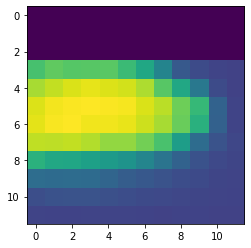

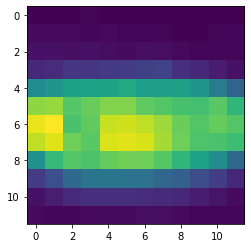

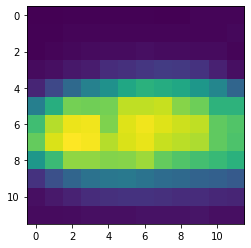

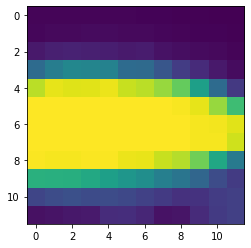

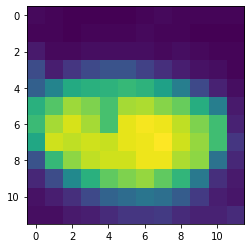

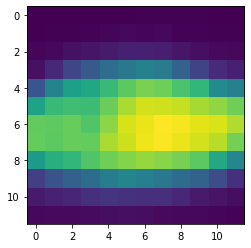

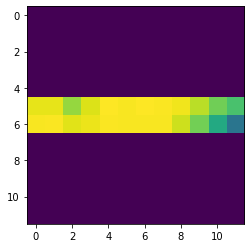

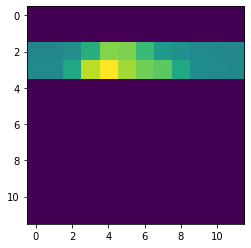

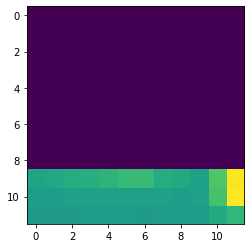

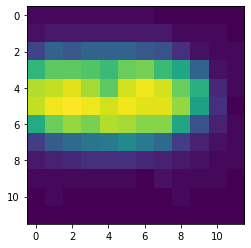

In [149]:
for i in range(0, len(ROI)):
    if np.amax(ROI[i]) > 0:
        print(np.amax(ROI[i]))
        plt.figure()
        plt.imshow(ROI[i][:,:,6])

In [178]:
# Save data in nuumpy format
begin = 2000
end = 2200
np.save('ROI_z'+str(begin)+':z'+str(end)+'_bias_corrected.npy', ROI)

In [28]:
# WHY IS THIS HERE? ITS NEVER USED

# #export cell coordinates as .npy
# xcoordinate=(fileLabelCSV['Center of Mass (Geometry): X (px)']).to_numpy()
# ycoordinate=(fileLabelCSV['Center of Mass (Geometry): Y (px)']).to_numpy()
# zcoordinate=(fileLabelCSV['Center of Mass (Geometry): Z (px)']).to_numpy()
ROI[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [179]:
#number of non-coding regions we want to isolate, lets say 515, same as number of cell regions
nNCMB = len(zfileLabelCSV)*10
NCR = []

#have 11 different coordinates for 1 non-cell region
for index0 in range(0,len(zfileLabelCSV)):
    if zfileLabelCSV[index0]> 2200 or zfileLabelCSV[index0] < 2000:
        continue
    else:
        #current coordinates
        xcoord = int(xfileLabelCSV[index0])
        ycoord = int(yfileLabelCSV[index0])
        zcoord = int(zfileLabelCSV[index0])
        ncrcell=[]
        while (len(ncrcell)) < 10:
            x_random = random.randint(7,20)
            y_random = random.randint(7,20)
            z_random = random.randint(7,20)
            #proceed =1
            #print("Random x,y,z for Non CMB Region:", x_random,y_random,z_random)

            #for i in x_invalid:
            #    if x_random == i:
            #        #print('x_false')
            #        proceed = 0
            #for i in y_invalid:
            #    if y_random == i:
            #        #print('y_false')
            #        proceed = 0
            #for i in z_invalid:
            #    if z_random == i:
            #        #print('z_false')
            #        proceed = 0
            if len(ncrcell) %8==0:
                #print("proceeding")
                ncrcell.append([xcoord+x_random,ycoord+y_random,zcoord+z_random])
            elif len(ncrcell) %8==1:
                #print("proceeding")
                ncrcell.append([xcoord-x_random,ycoord+y_random,zcoord+z_random])
            elif len(ncrcell) %8==2:
                #print("proceeding")
                ncrcell.append([xcoord+x_random,ycoord-y_random,zcoord+z_random])
            elif len(ncrcell) %8==3:
                #print("proceeding")
                ncrcell.append([xcoord+x_random,ycoord+y_random,zcoord-z_random])
            elif len(ncrcell) %8==4:
                #print("proceeding")
                ncrcell.append([xcoord+x_random,ycoord-y_random,zcoord-z_random])
            elif len(ncrcell) %8==5:
                #print("proceeding")
                ncrcell.append([xcoord-x_random,ycoord+y_random,zcoord-z_random])
            elif len(ncrcell) %8==6:
                #print("proceeding")
                ncrcell.append([xcoord-x_random,ycoord-y_random,zcoord+z_random])
            else:
                ncrcell.append([xcoord-x_random,ycoord-y_random,zcoord-z_random])
        for i in ncrcell:
            NCR.append(i)
        #print(len(NCR))

print("%s non-CMB regions were isolated." %(len(NCR)), "Adding to the master dictionary.")

400 non-CMB regions were isolated. Adding to the master dictionary.


In [205]:
# NCR_total = np.zeros((len(NCR),12,12,12))

for index0 in range(285,len(NCR)):
    voxel = np.zeros((12,12,12))
    
    #current coordinates
    xcoord = int(NCR[index0][0])
    ycoord = int(NCR[index0][1])
    zcoord = int(NCR[index0][2])

    #for every z, append the x&ys
    for index,i in enumerate(range(zcoord-6,zcoord+6)):
        for file in list:
            if str("tif") in str(file):
                if len(str(i))==1:
                    i=str("000"+str(i))
                if len(str(i))==2:
                    i=str("00"+str(i))
                if len(str(i))==3:
                    i=str("0"+str(i))
                if str(i) in str(file):                    
                    scan1 = np.asarray(Image.open(file_path_img + '/'+file))
                    scan = np.zeros(scan1.shape)
                    scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
                    plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
        voxel[index] = np.asarray(plane)
    NCR_total[index0]=np.asarray(voxel)

In [215]:
np.save('NCR_z'+str(begin)+':z'+str(end)+'_bias_corrected.npy', np.asarray(NCR_total))

In [220]:
NCR[34][0]-30, NCR[34][0]+30

(6024, 6084)

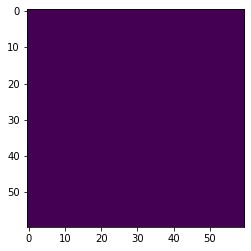

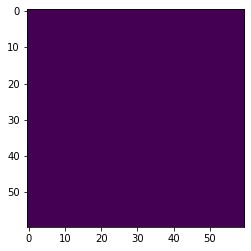

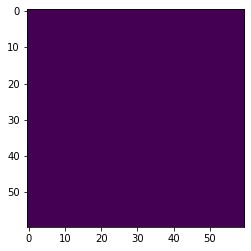

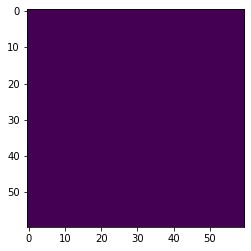

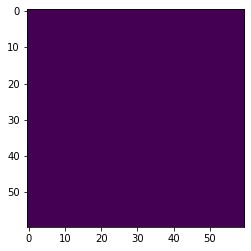

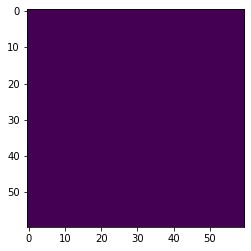

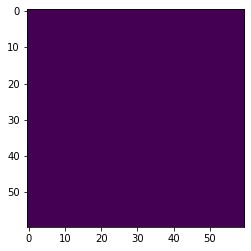

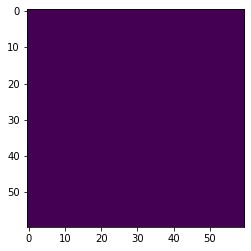

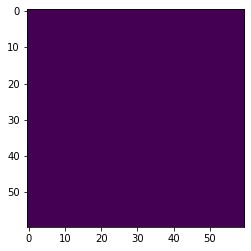

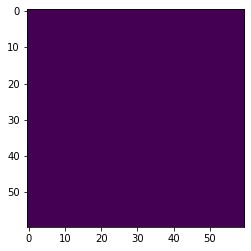

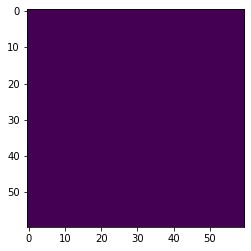

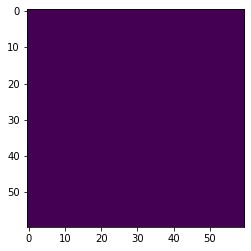

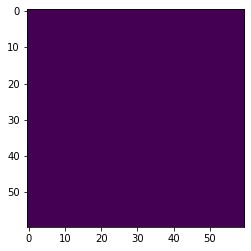

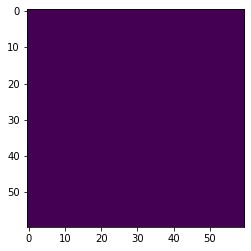

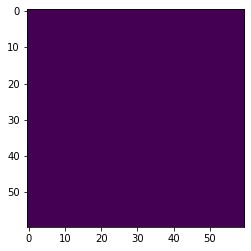

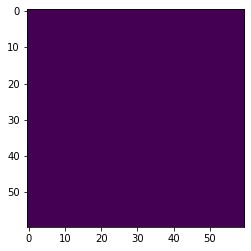

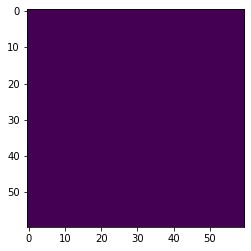

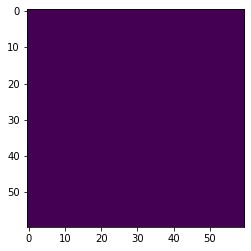

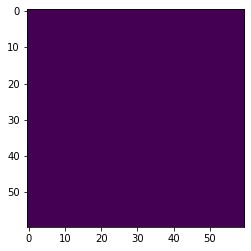

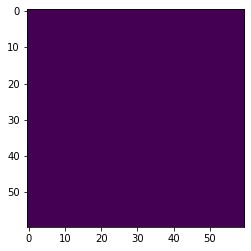

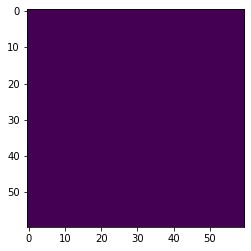

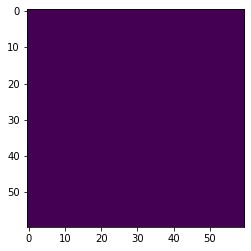

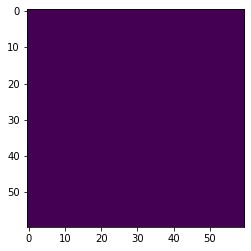

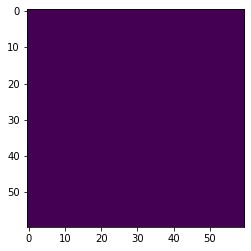

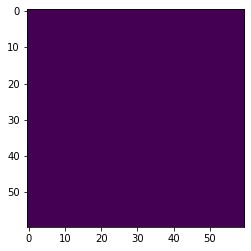

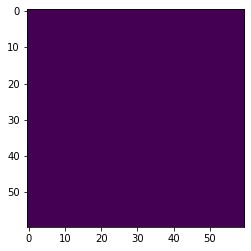

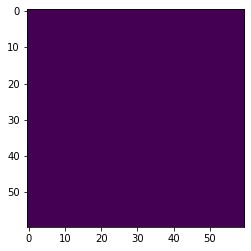

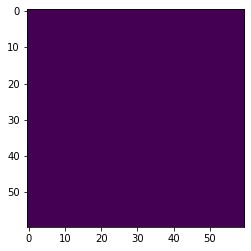

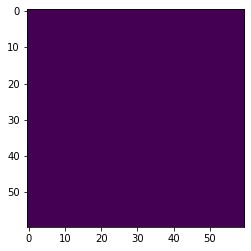

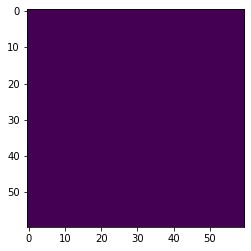

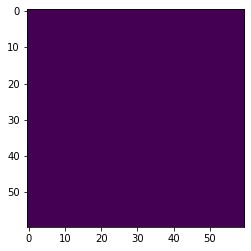

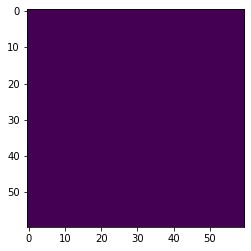

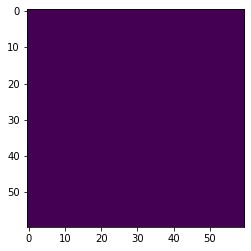

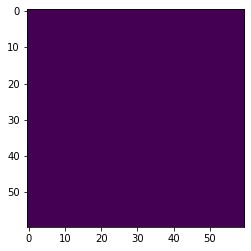

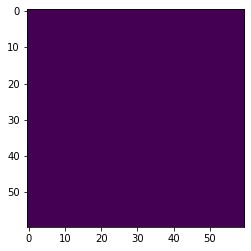

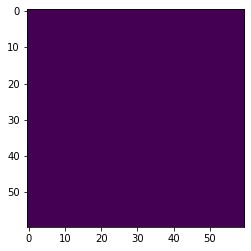

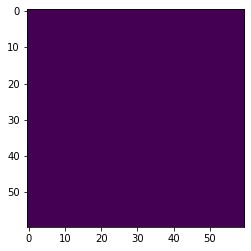

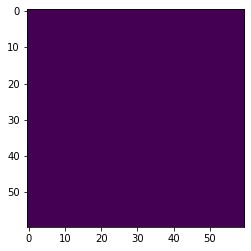

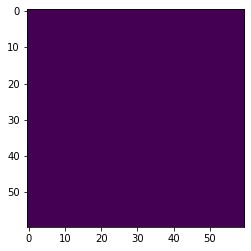

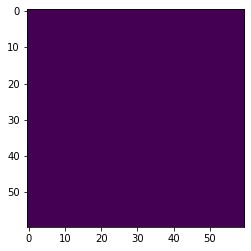

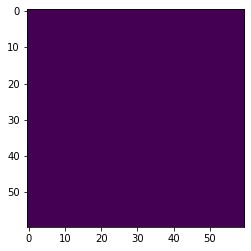

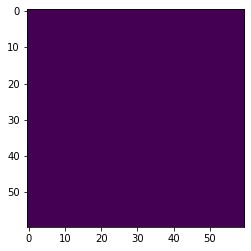

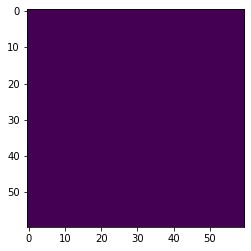

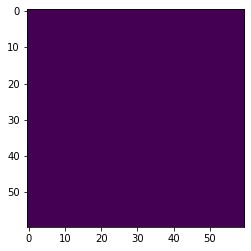

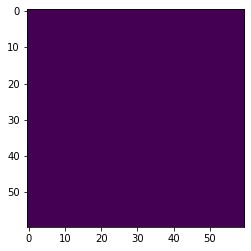

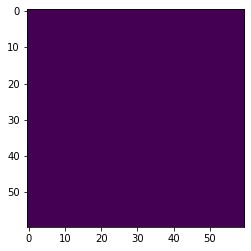

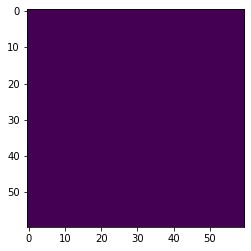

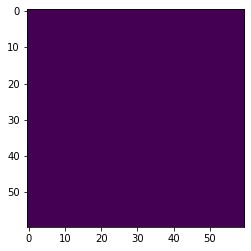

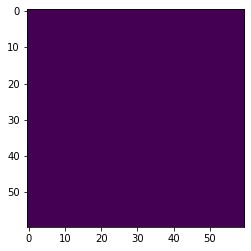

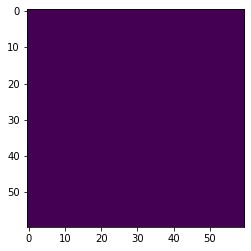

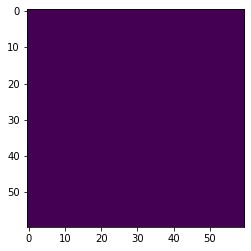

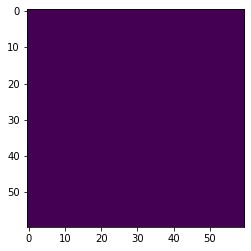

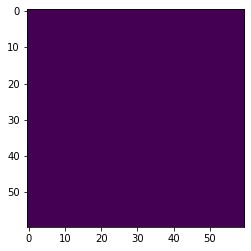

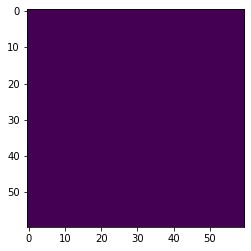

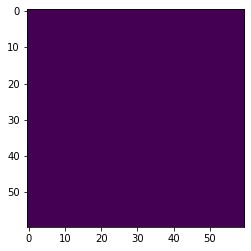

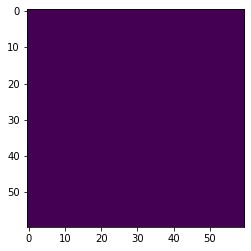

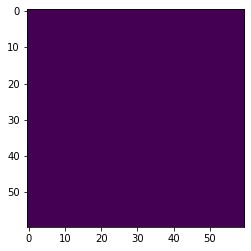

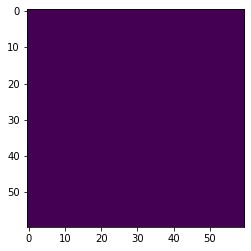

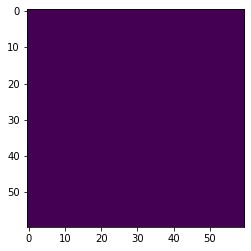

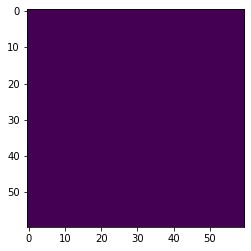

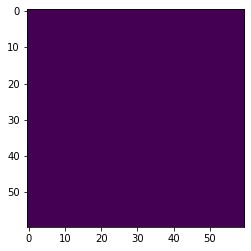

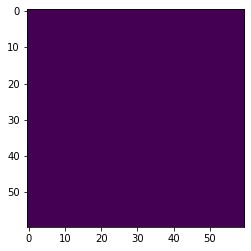

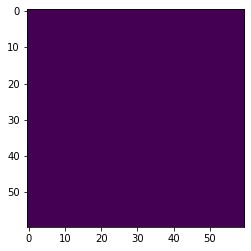

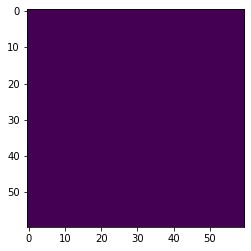

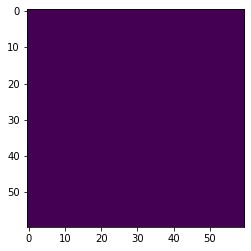

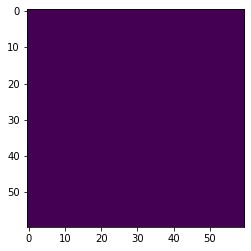

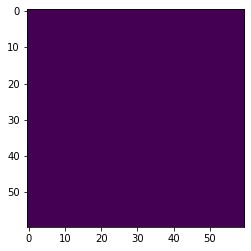

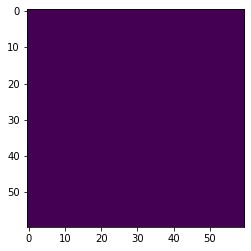

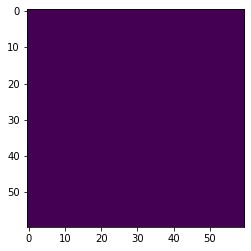

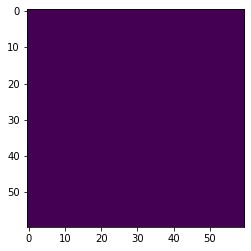

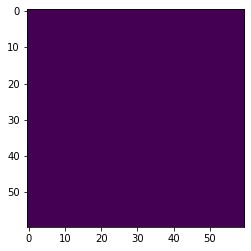

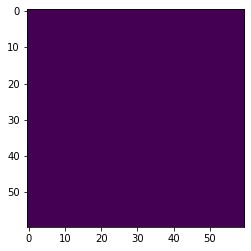

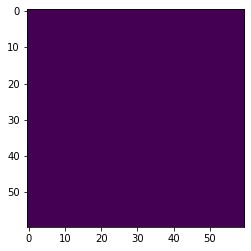

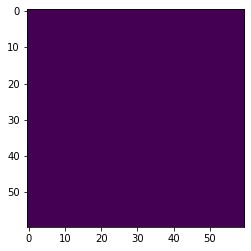

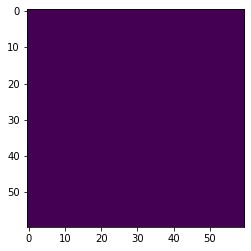

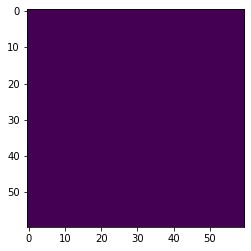

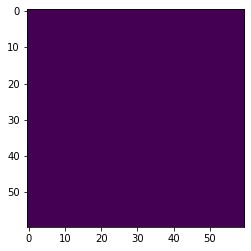

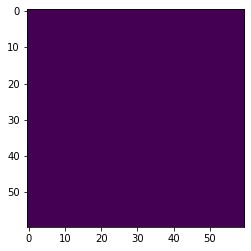

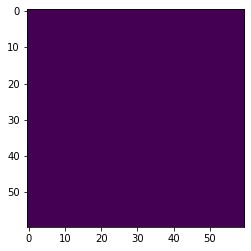

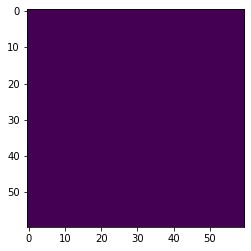

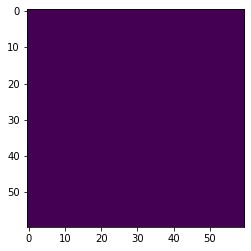

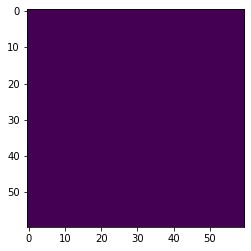

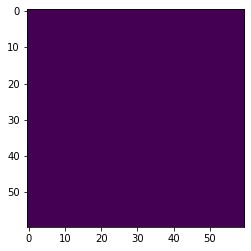

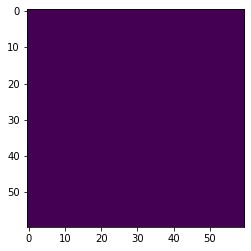

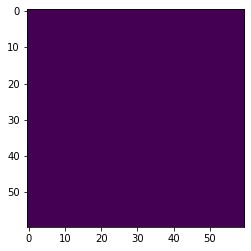

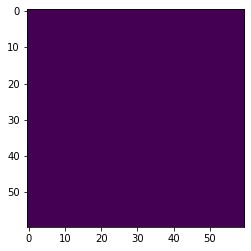

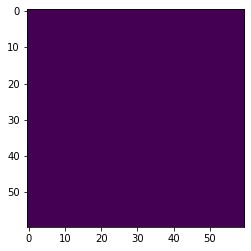

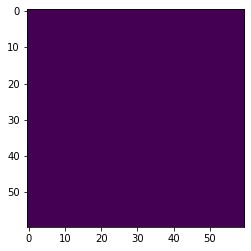

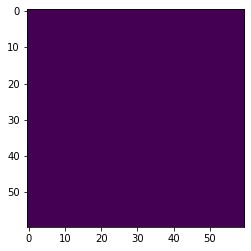

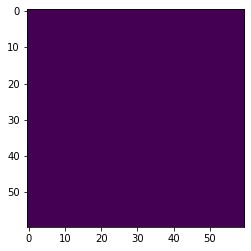

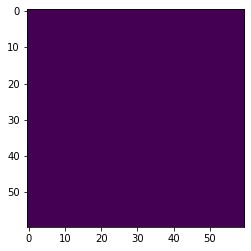

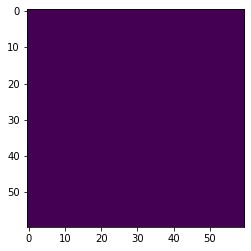

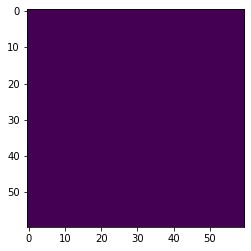

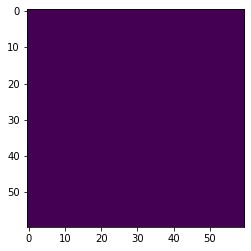

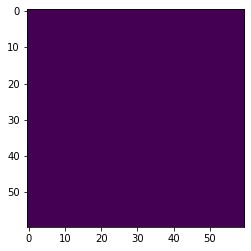

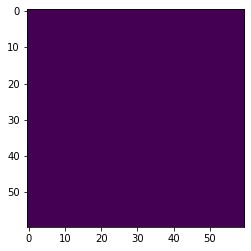

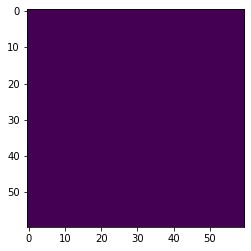

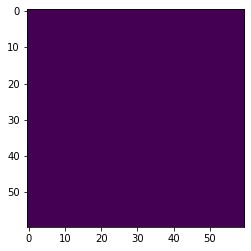

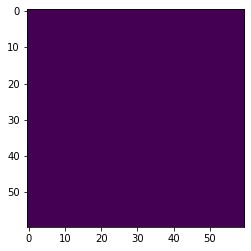

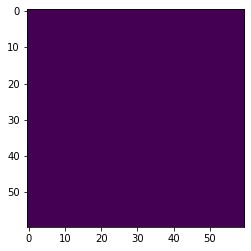

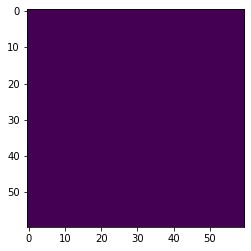

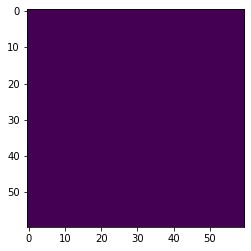

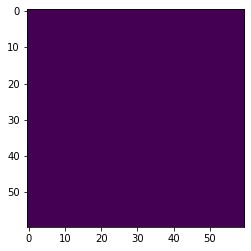

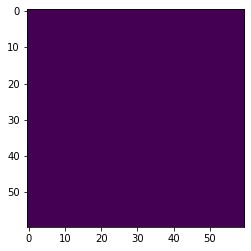

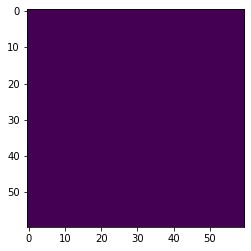

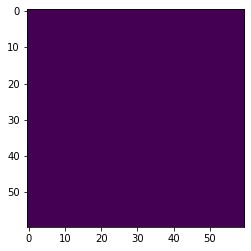

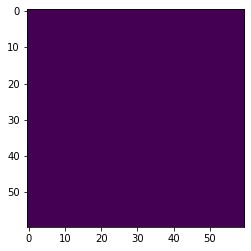

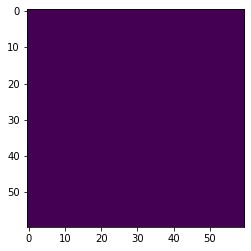

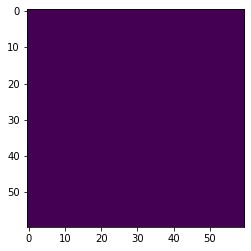

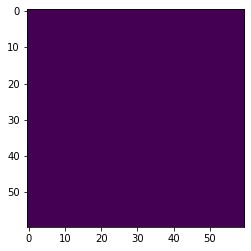

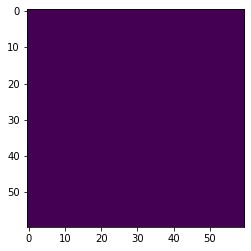

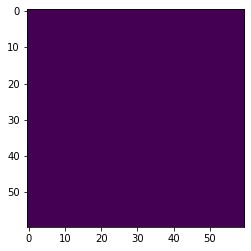

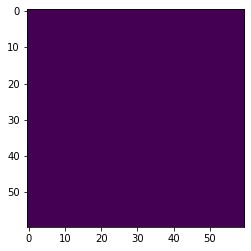

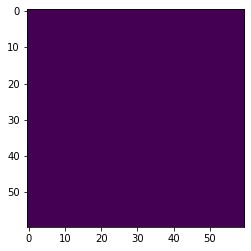

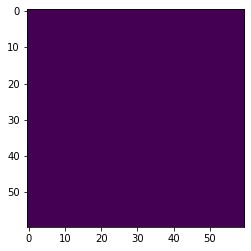

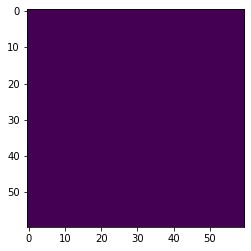

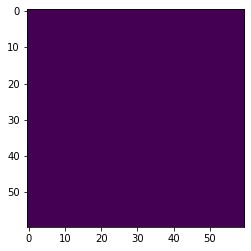

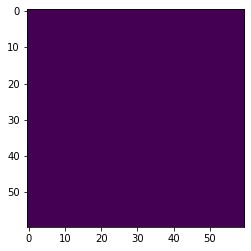

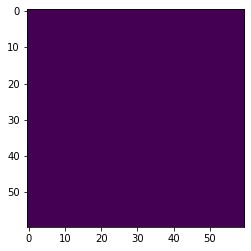

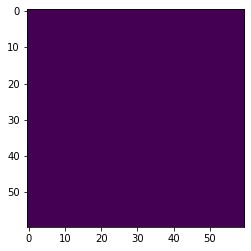

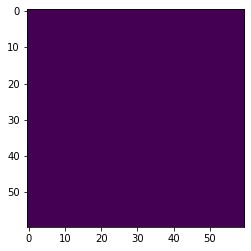

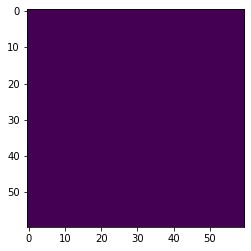

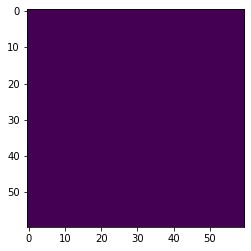

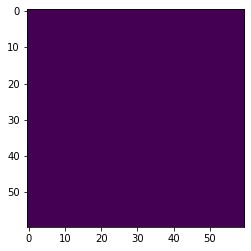

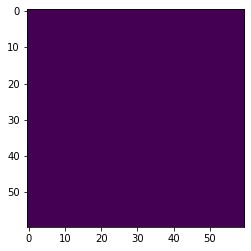

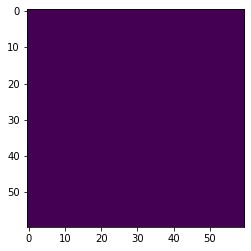

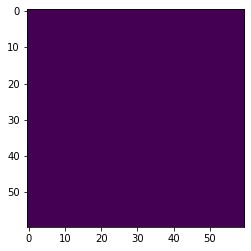

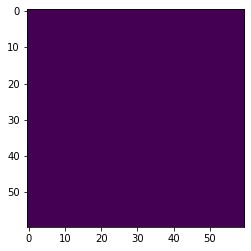

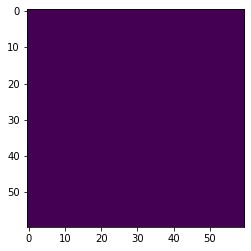

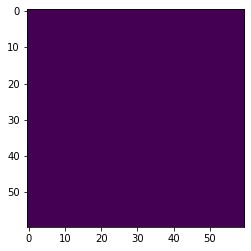

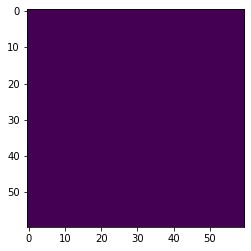

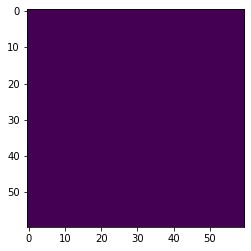

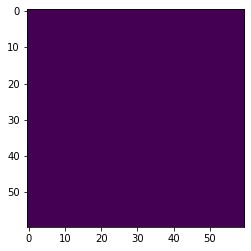

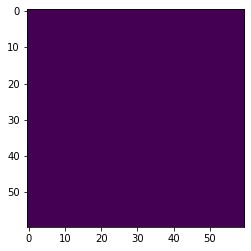

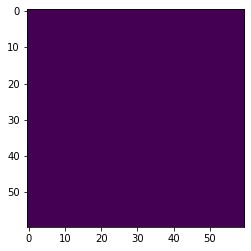

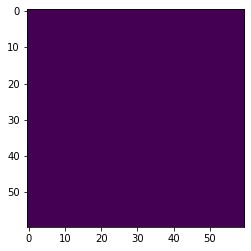

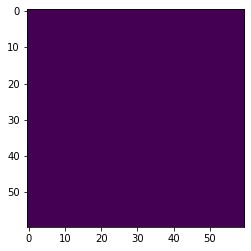

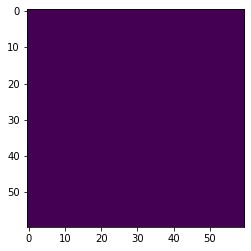

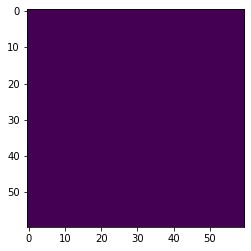

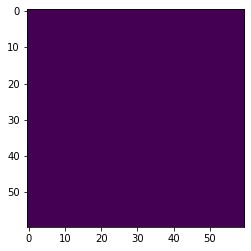

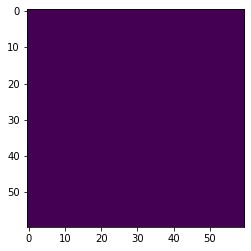

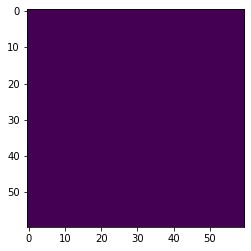

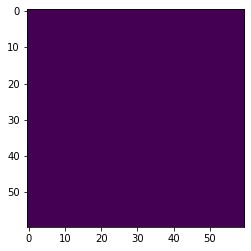

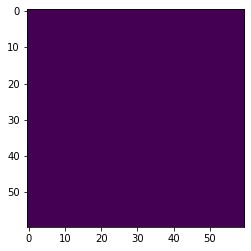

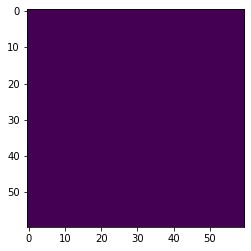

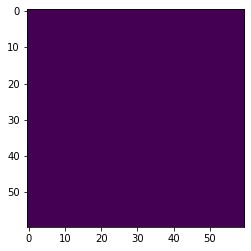

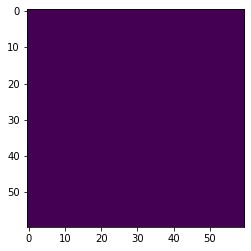

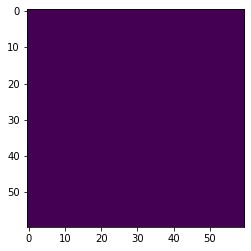

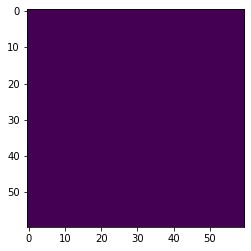

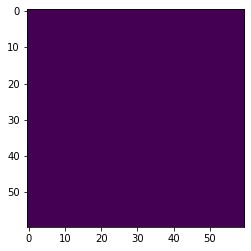

In [231]:
for pln in range(0, 150):
    plt.imshow(scan[NCR[pln][0]-30:NCR[pln][0]+30,NCR[pln][1]-30:NCR[pln][1]+30])
    plt.show()

In [10]:
ROI = np.load('ROI_z2000:z2200_bias_corrected.npy')

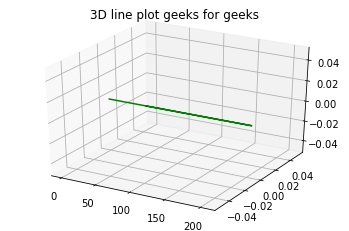

In [297]:
# for cube in range(0,39):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     Axes3D.plot(xs, ys)
#     ROI[cube,:,:,:]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
  
# defining all 3 axes 
x = ROI[1,:,1,1]
y = ROI[1,1,:,1] 
z = ROI[1,1,1,:]

# plotting 
ax.plot3D(x, y, z, 'green') 
ax.set_title('3D line plot geeks for geeks') 
plt.show() 

In [13]:
ROI[0].shape

(12, 12, 12)

In [2]:
import napari
from brainlit.utils.session import NeuroglancerSession
from brainlit.utils.swc import graph_to_paths

dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"
mip = 3
v_id = 0
radius = 15 #should this be 75 as in the tutorial? or 15 because Bijan

# get image and center point
ngl_sess = NeuroglancerSession(mip = mip, url = dir, url_segments=dir_segments)
img, bbox, vox = ngl_sess.pull_voxel(2, v_id, radius)
print(f"\n\nDownloaded volume is of shape {img.shape}, with total intensity {sum(sum(sum(img)))}.")

Downloading: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]
Downloading: 44it [00:01, 42.04it/s]                         



Downloaded volume is of shape (151, 151, 151), with total intensity 4461912.


In [4]:
G_sub = ngl_sess.get_segments(2, bbox)
paths = graph_to_paths(G_sub)
print(f"Selected volume contains {G_sub.number_of_nodes()} nodes and {len(paths)} paths")

Downloading: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Selected volume contains 11 nodes and 1 paths


In [14]:
with napari.gui_qt():
    viewer = napari.Viewer(ndisplay=3)
    viewer.add_image(ROI[0].shape)
    viewer.add_shapes(data=paths, shape_type='path', edge_width=0.1, edge_color='blue', opacity=0.0)
    viewer.add_points(vox, size=1, opacity=0.5)

ERROR:root:Unhandled exception:
Traceback (most recent call last):
  File "/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/napari/_qt/event_loop.py", line 79, in gui_qt
    yield app
  File "<ipython-input-14-2a37586a5d5d>", line 3, in <module>
    viewer.add_image(ROI[0].shape)
  File "/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/napari/components/add_layers_mixin.py", line 223, in add_image
    return self.add_layer(layers.Image(data, **kwargs))
  File "/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/napari/layers/image/image.py", line 163, in __init__
    multiscale, data = guess_multiscale(data)
  File "/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/napari/layers/image/_image_utils.py", line 54, in guess_multiscale
    shapes = [d.shape for d in data]
  File "/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/napari/layers/image/_image_utils.p